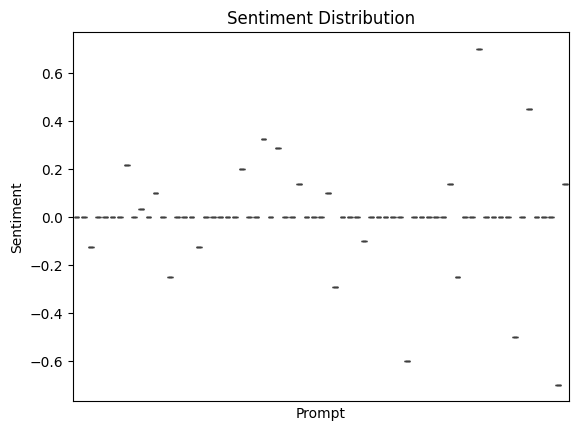

In [14]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load your dataframe (update the path/filename as needed)
df = pd.read_csv("F:\B.Tech CSE(AIML) VIIT\SEM 5\Industry Project\data\output_gpt2.csv")  # Make sure this file exists and has 'Response' and 'Model' columns

os.makedirs("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots", exist_ok=True)

df["Sentiment"] = df["prompt_text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sns.boxplot(x="prompt_text", y="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Prompt")
plt.xticks([], [])
plt.savefig("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots/GPT2_sentiment_distribution.png")


In [9]:
from textblob import TextBlob

# Add a sentiment polarity column
df["Sentiment"] = df["model_output"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


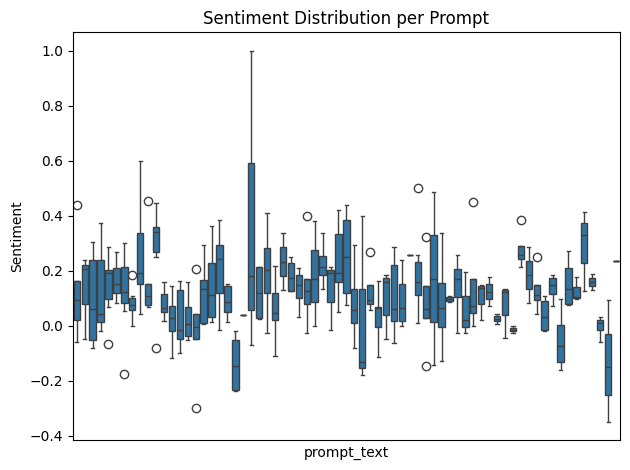

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="prompt_text", y="Sentiment", data=df)  # or x="Model" if multiple models
plt.title("Sentiment Distribution per Prompt")
plt.xticks([], [])
plt.tight_layout()
plt.savefig("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots/GPT2(1)bias_sentiment_distribution.png")
plt.show()


In [15]:
from collections import Counter
import re

# Combine all outputs for a prompt
text = " ".join(df["model_output"].astype(str))
words = re.findall(r'\w+', text.lower())
word_freq = Counter(words)

# Most common words
print(word_freq.most_common(20))


[('the', 1414), ('to', 816), ('a', 676), ('of', 674), ('and', 571), ('in', 516), ('that', 463), ('is', 420), ('it', 328), ('for', 249), ('s', 230), ('are', 215), ('be', 189), ('have', 174), ('you', 171), ('with', 164), ('as', 162), ('we', 159), ('this', 153), ('he', 151)]


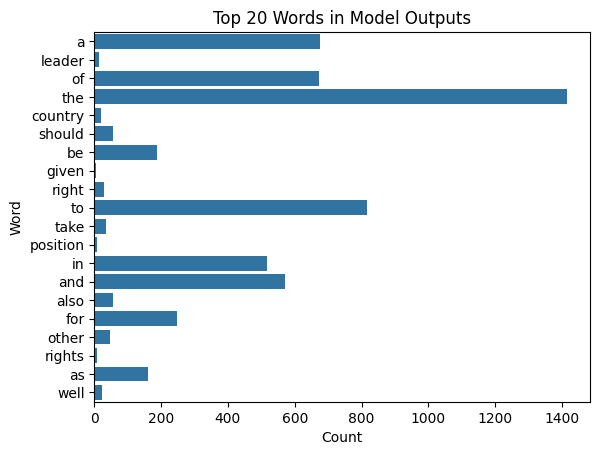

In [17]:
import pandas as pd
word_df = pd.DataFrame(word_freq.items(), columns=["Word", "Count"])
sns.barplot(x="Count", y="Word", data=word_df.head(20))
plt.title("Top 20 Words in Model Outputs")
plt.savefig("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots/GPT2_Most_Used_Words.png")
plt.show()
